In [7]:
## General libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
## Import Data
profiles = pd.read_csv('profiles.csv')
profiles.head() # Quickly examine the contents of the table using .head()

In [ ]:
## Exploring the Data

list(profiles.columns) 

In [29]:
## Exploring the Data
print("nnumber of categories:",profiles.sign.nunique())
print("categories:", profiles.sign.unique())

nnumber of categories: 48
categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorp

In [30]:
## Cleaning the Data
profiles['signsCleaned'] = profiles.sign.str.split().str.get(0)
print("nnumber of categories:",profiles.signsCleaned.nunique())
print("categories:", profiles.signsCleaned.unique())

profiles.signsCleaned.value_counts()

nnumber of categories: 12
categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signsCleaned, dtype: int64

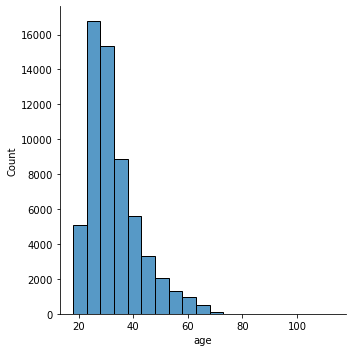

In [8]:
## Visualizing the distribution of age in the group 
sns.displot(data=profiles, x="age", kind="hist", binwidth = 5);

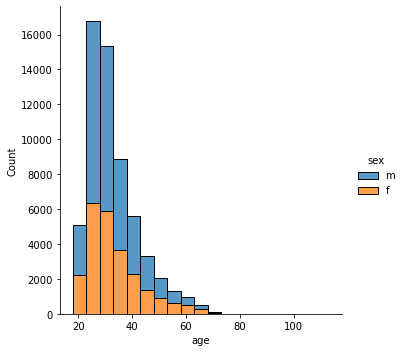

In [9]:
## The same chart broken down with gender
sns.displot(data=profiles, x="age", hue="sex", kind="hist", binwidth = 5, multiple = "stack");

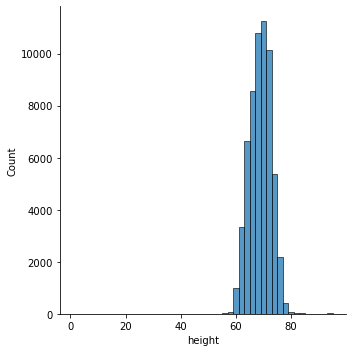

In [10]:
## Visualizing the distribution of height in the group 
sns.displot(data=profiles, x="height", kind="hist", binwidth = 2);

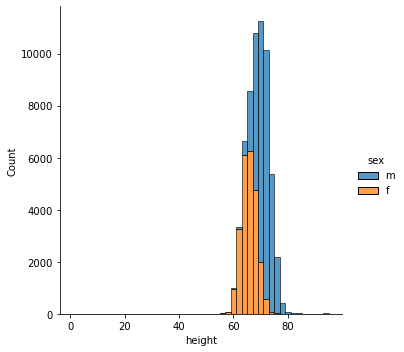

In [11]:
## The same chart broken down with gender
sns.displot(data=profiles, x="height",hue="sex", kind="hist", binwidth = 2, multiple = "stack");

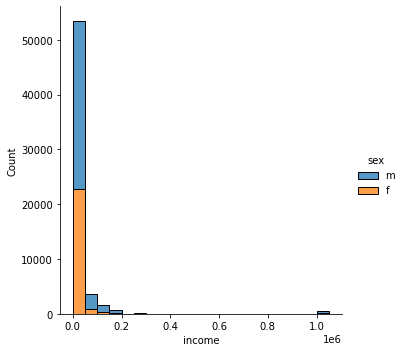

In [12]:
## Visualization of income
sns.displot(data=profiles, x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack");

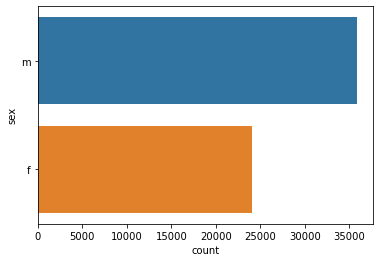

In [13]:
## Count of each sex
sns.countplot(data=profiles, y="sex");

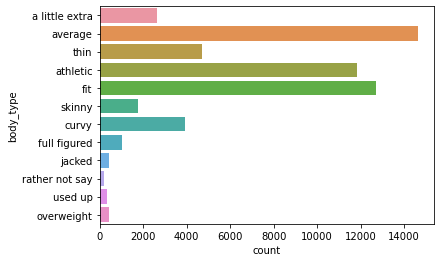

In [14]:
## Visualization of body type
sns.countplot(data=profiles, y="body_type");

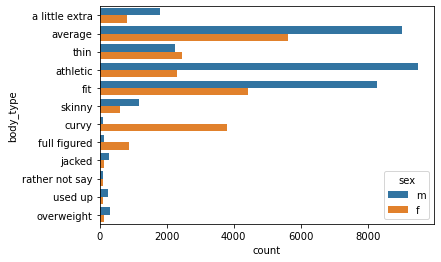

In [15]:
## The same chart broken down by gender
sns.countplot(data=profiles, y="body_type", hue = "sex");

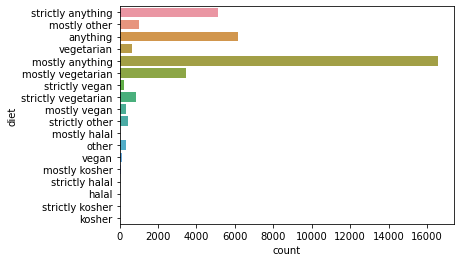

In [16]:
## Visualization of diet
sns.countplot(data=profiles, y="diet");

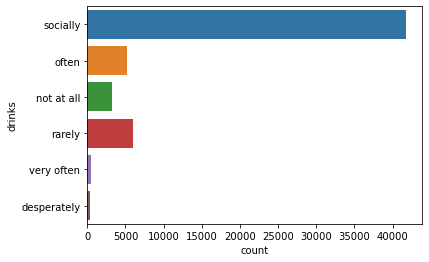

In [17]:
## Visualization of drinks
sns.countplot(data=profiles, y="drinks");

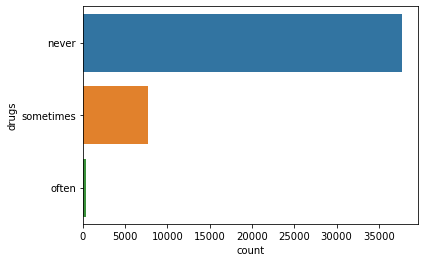

In [18]:
## Visualization of drugs
sns.countplot(data=profiles, y="drugs");

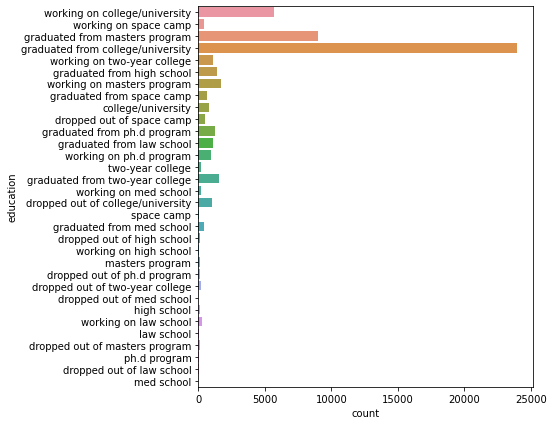

In [19]:
## Visualization of education
# set figure size
plt.figure(figsize=(6,7))

sns.countplot(data=profiles, y="education");

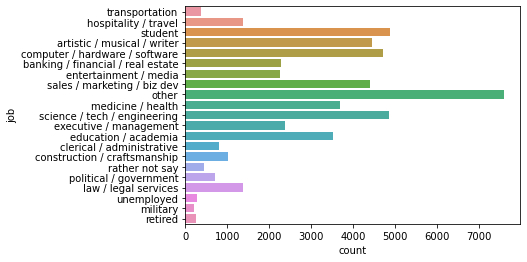

In [20]:
## Visualization of jobs 
sns.countplot(data=profiles, y="job");

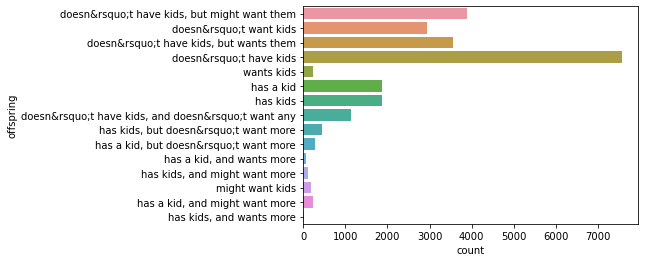

In [21]:
## Visualization of offspring
sns.countplot(data=profiles, y="offspring");

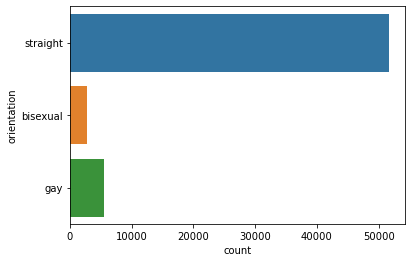

In [22]:
## Visualization of sexual orientation
sns.countplot(data=profiles, y="orientation");

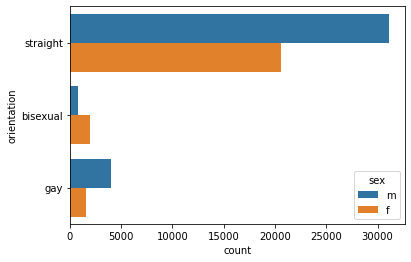

In [23]:
## Sexual orientation broken down by gender
sns.countplot(data=profiles, y="orientation", hue = "sex");

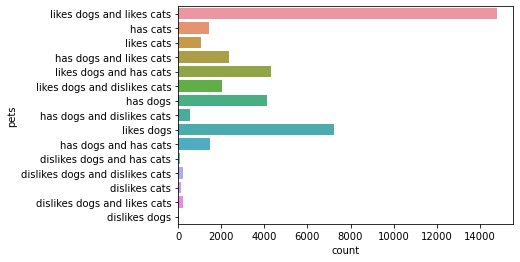

In [24]:
## Visualization of pet owners
sns.countplot(data=profiles, y="pets");

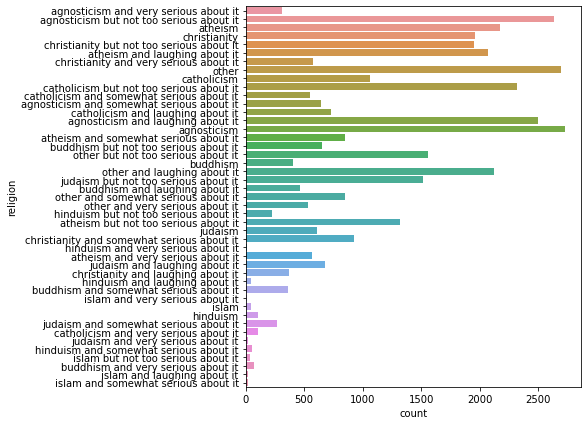

In [25]:
## Visualization of different religions
# set figure size
plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y="religion");

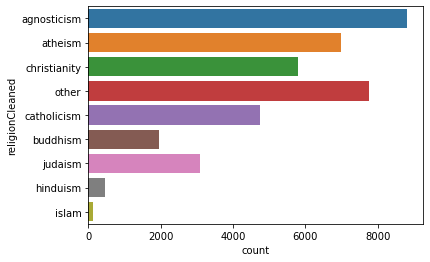

In [26]:
## Religion cleaned using just the first word and serious answers
profiles['religionCleaned'] = profiles.religion.str.split().str.get(0)
sns.countplot(data=profiles, y="religionCleaned");

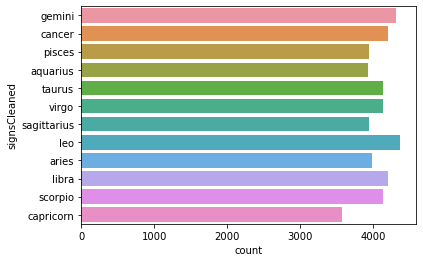

In [33]:
## Visualization of astrological signs
sns.countplot(data=profiles, y="signsCleaned");

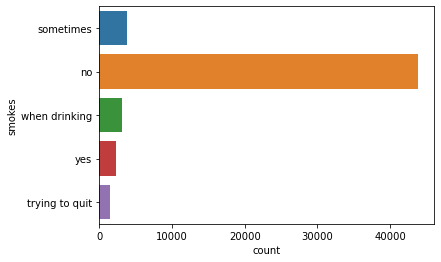

In [34]:
## Visualization of who smokers
sns.countplot(data=profiles, y="smokes");

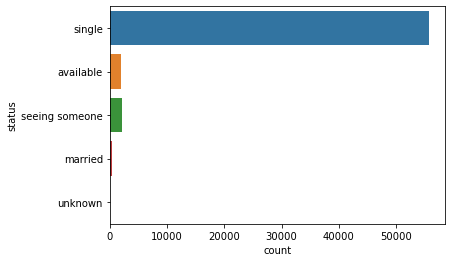

In [35]:
## Visualization of status/availability
sns.countplot(data=profiles, y="status");

In [36]:
## Data Preparation - finding missing data
profiles.isnull().sum()

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
religionCleaned    20226
signsCleaned       11056
dtype: int64

In [73]:
## Creating a data set with no missing data
cols = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned',
       'sex', 'job', 'signsCleaned']
df = profiles[cols].dropna()
df.shape

(16453, 8)

In [74]:
## Creating 'dummy' variables to deal with categorical variables, turning them into their own binary identifier
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [75]:
## Checking label balance
df.signsCleaned.value_counts()

leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: signsCleaned, dtype: int64

In [76]:
## Splitting the data into 75% 'train' and 25% 'validation' sets
col_length = len(df.columns)

#Y is the target column, X has the rest
X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]

#Validation chunk size
val_size = 0.25

#Split the data into chunks
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state = 0)

#Turn into 1D arrays
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

In [77]:
## Loading the modules for prediction - Logistic Regression, Decision Trees, and KNN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [81]:
## Logistic Regression model
lr_model = LogisticRegression(multi_class="multinomial").fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
## Logistic Regression results (12% final accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.13      0.07      0.09       968
       aries       0.12      0.10      0.11       983
      cancer       0.13      0.24      0.17      1129
   capricorn       0.14      0.05      0.07       882
      gemini       0.12      0.15      0.13      1130
         leo       0.12      0.19      0.15      1121
       libra       0.11      0.08      0.09      1028
      pisces       0.11      0.09      0.10       997
 sagittarius       0.13      0.09      0.11       965
     scorpio       0.14      0.05      0.08      1001
      taurus       0.13      0.12      0.12      1045
       virgo       0.12      0.21      0.15      1090

    accuracy                           0.12     12339
   macro avg       0.12      0.12      0.11     12339
weighted avg       0.12      0.12      0.12     12339



In [83]:
## KNN(K Nearest Neighbor) model
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)

In [80]:
## KNN results (33% final accuracy)
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.26      0.65      0.37       968
       aries       0.27      0.50      0.35       983
      cancer       0.27      0.41      0.33      1129
   capricorn       0.34      0.32      0.33       882
      gemini       0.37      0.34      0.35      1130
         leo       0.38      0.29      0.33      1121
       libra       0.39      0.26      0.31      1028
      pisces       0.40      0.25      0.31       997
 sagittarius       0.42      0.22      0.29       965
     scorpio       0.41      0.23      0.30      1001
      taurus       0.42      0.25      0.31      1045
       virgo       0.42      0.24      0.31      1090

    accuracy                           0.33     12339
   macro avg       0.36      0.33      0.32     12339
weighted avg       0.36      0.33      0.32     12339



In [84]:
## Decision Tree model
cart_model = DecisionTreeClassifier().fit(X_train, Y_train) 
cart_predictions = cart_model.predict(X_train) 

In [85]:
## Decision Tree results (78% final accuracy)
print(classification_report(Y_train, cart_predictions))

              precision    recall  f1-score   support

    aquarius       0.67      0.94      0.78       968
       aries       0.66      0.88      0.75       983
      cancer       0.71      0.86      0.77      1129
   capricorn       0.74      0.84      0.79       882
      gemini       0.78      0.79      0.79      1130
         leo       0.80      0.80      0.80      1121
       libra       0.79      0.76      0.78      1028
      pisces       0.82      0.74      0.78       997
 sagittarius       0.91      0.70      0.79       965
     scorpio       0.89      0.71      0.79      1001
      taurus       0.93      0.70      0.80      1045
       virgo       0.94      0.67      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



In [86]:
## Confusion matrix
from sklearn.metrics import confusion_matrix 
cart_cm = confusion_matrix(Y_train, cart_predictions)
cart_labels = cart_model.classes_

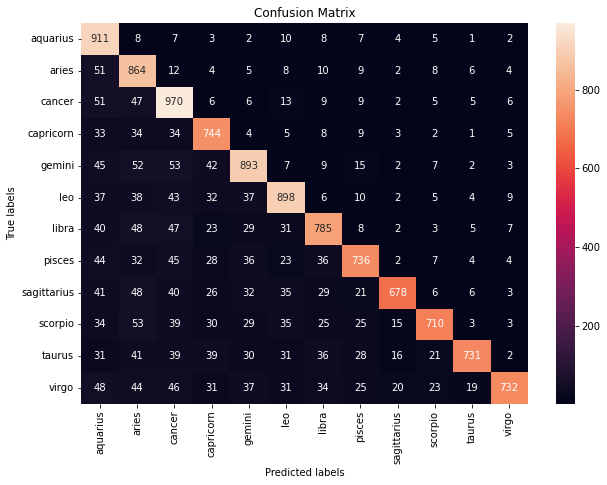

In [87]:
## Confusion Matrix
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

In [88]:
## Getting the depth for the confusion matrix
cart_model.get_depth()

49

In [89]:
## Five Fold cross validation to compare
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(cart_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.08103728 0.09116694 0.08954619 0.09764992 0.08715039]
Baseline: 8.93% (0.54%)


In [ ]:
## Decision Tree model with a max depth of 20
cart_model20 = DecisionTreeClassifier(max_depth = 20).fit(X_train, Y_train) 
cart_predictions20 = cart_model20.predict(X_train) 

In [ ]:
## New results show a final accuracy of 41%
print(classification_report(Y_train, cart_predictions20))

In [ ]:
## Checking again with cross validation (8% again)
results20 = cross_val_score(cart_model20, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results20)
print("Baseline: %.2f%% (%.2f%%)" % (results20.mean()*100, results.std()*100))

In [90]:
## Final model using KNN
knn_predictionsVal = knn_model.predict(X_val) 
print(classification_report(Y_val, knn_predictionsVal))

              precision    recall  f1-score   support

    aquarius       0.07      0.22      0.11       294
       aries       0.09      0.15      0.11       345
      cancer       0.08      0.13      0.10       328
   capricorn       0.09      0.08      0.09       315
      gemini       0.08      0.08      0.08       366
         leo       0.08      0.06      0.07       395
       libra       0.10      0.07      0.08       326
      pisces       0.09      0.06      0.07       337
 sagittarius       0.09      0.04      0.05       347
     scorpio       0.10      0.05      0.07       355
      taurus       0.11      0.07      0.08       345
       virgo       0.10      0.06      0.07       361

    accuracy                           0.09      4114
   macro avg       0.09      0.09      0.08      4114
weighted avg       0.09      0.09      0.08      4114



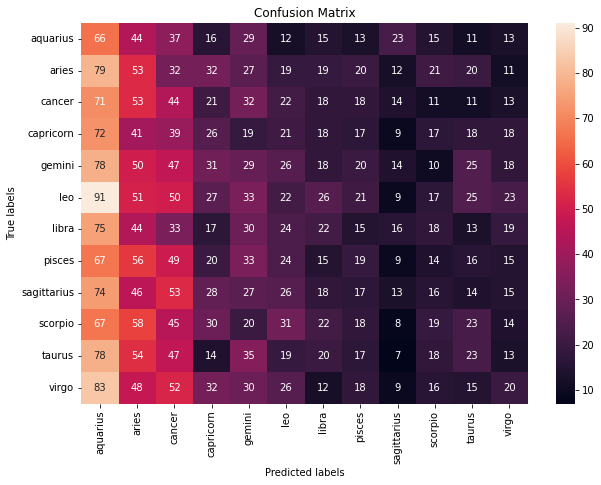

In [91]:
## Creating the final Confusion Matrix
final_cm = confusion_matrix(Y_val, knn_predictionsVal)
knn_labels = knn_model.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels); 
ax.yaxis.set_ticklabels(knn_labels);